# Analysis Pymaceuticals Inc.
---
 

This study was realized in 248 mices (49% female and 51% male) testing 09 different types of drugs and Placebo. 
Out of the ten drugs,  four drugs had better results and were analyzed separetedly. The results shows that Capomulin and Ramicane, have a lower median Tumor Volume which indicates they got more positive results than Infubinol and Ceftamine.
There is a strong correlation between weight and average tumor volume in the drug Capomulin. The heavier the mouse, the larger the tumor. 

 

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data_df = pd.merge(study_results, mouse_metadata, how='outer', on=['Mouse ID'])

# Display the data table for preview
merged_data_df.sample(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1822,g316,35,44.702833,2,Capomulin,Female,22,22
225,v339,0,45.000000,0,Infubinol,Male,20,26
1383,l661,40,59.205669,3,Ceftamin,Male,18,26
960,d164,5,46.617671,0,Zoniferol,Male,21,28
193,k382,0,45.000000,0,Ketapril,Male,22,29


In [33]:
# Checking the number of mice.
total_mice = len(merged_data_df['Mouse ID'].unique())
total_mice

249

In [26]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = merged_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicated_mice_ID = merged_data_df.loc[duplicated_mice, 'Mouse ID'].unique()
duplicated_mice_ID

array(['g989'], dtype=object)

In [38]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_ID_data = merged_data_df.loc[merged_data_df['Mouse ID'] == duplicated_mice_ID[0]]
duplicated_mice_ID_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [77]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = merged_data_df.drop(duplicated_mice_ID_data.index)
clean_data_df.sample(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1515,s141,15,49.232345,1,Propriva,Male,8,25
91,x930,5,46.078234,0,Naftisol,Male,13,26
160,m133,20,52.636882,1,Naftisol,Female,2,26
1052,q511,45,68.611061,3,Zoniferol,Female,2,28
743,p387,30,63.269246,0,Stelasyn,Male,3,30


In [6]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean = len(clean_data_df['Mouse ID'].unique())
number_mice_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


drug_regimen = clean_data_df.groupby('Drug Regimen')

# Mean
mean = drug_regimen['Tumor Volume (mm3)'].mean()

# Median
median = drug_regimen['Tumor Volume (mm3)'].median()

# Variance 
var = drug_regimen['Tumor Volume (mm3)'].var()

# Standard deviation
std = drug_regimen['Tumor Volume (mm3)'].std()

# SEM: return unbiased stardard error of mean 
sem = drug_regimen['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary DataFrame. 
summary_statistics_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': var,
    'Standard deviation': std,
    'SEM': sem
})


summary_statistics_df


,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

summary_table = drug_regimen['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg_df = summary_table.rename(columns={
    'mean':'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard deviation',
    'sem': 'SEM'
})

summary_agg_df


,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
#  total number mice tested for each drug regimen .
number_mice_per_regimen = drug_regimen['Mouse ID'].count().sort_values(ascending=False)
number_mice_per_regimen


Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

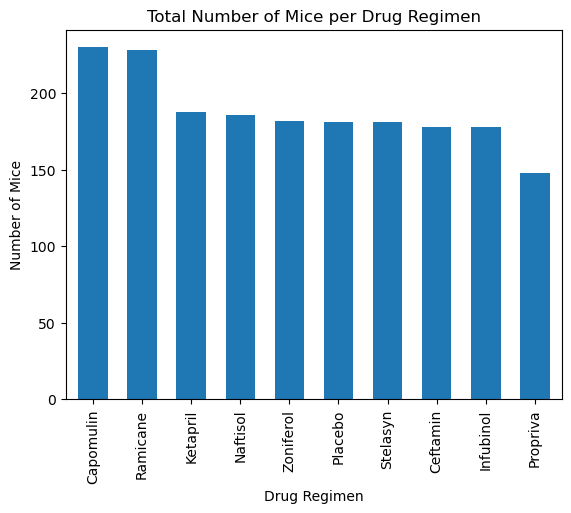

In [47]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas. 
pd_bar = number_mice_per_regimen.plot(kind='bar', width=0.6)

pd_bar.set_title(label='Total Number of Mice per Drug Regimen')
pd_bar.set_xlabel('Drug Regimen')
pd_bar.set_ylabel('Number of Mice')

plt.show()


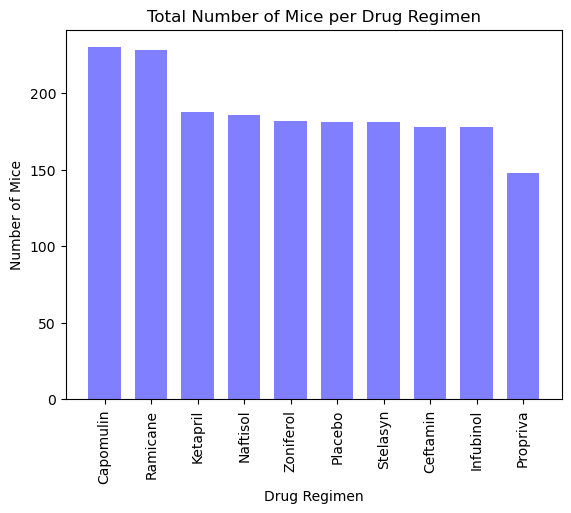

In [48]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis_regimen = np.arange(len(number_mice_per_regimen))
regimen_name = list(number_mice_per_regimen.index.values)
 
py_bar = plt.bar(x_axis_regimen, number_mice_per_regimen, color='blue', alpha=0.5, width=0.7)

plt.xticks(x_axis_regimen, regimen_name, rotation='vertical')
plt.title('Total Number of Mice per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')

plt.show()



In [12]:
# Calculate number of mice for each sex
sex_mice = clean_data_df.groupby('Sex')['Sex'].count()
sex_mice

Sex
Female    922
Male      958
Name: Sex, dtype: int64

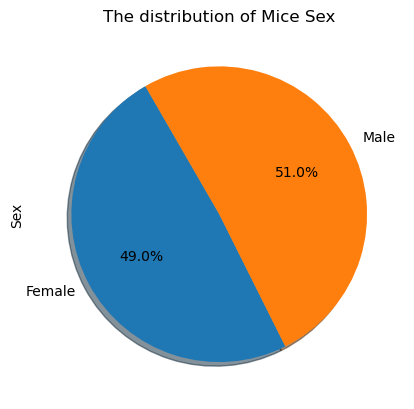

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pd_pie_mice_sex = sex_mice.plot(kind='pie', autopct='%1.1f%%', shadow=True,startangle=120)
pd_pie_mice_sex.set_title(label='The distribution of Mice Sex')

plt.show()

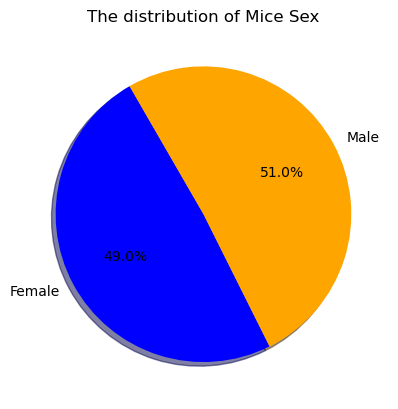

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = sex_mice.index
colors = ['blue','orange']

py_bar_mice_sex = plt.pie(sex_mice, labels=sex_mice.index, autopct="%1.1f%%",shadow=True,colors=colors, startangle=120)

plt.title('The distribution of Mice Sex')

plt.show()


## Quartiles, Outliers and Boxplots

In [52]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_tumor_vol = clean_data_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
final_tumor_df = final_tumor_vol.reset_index()


In [74]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    final_tumor_vol_list.append(final_tumor_vol)
    
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
   
    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound)|(final_tumor_vol > upper_bound)]
   
    print(f"Number of outliers for {drug}  is: {outliers.count()}")

    if outliers.count() > 0:
         for i in outliers.index:
            print(f'Outlier final tumor volume(mm3) is {round(outliers[i], 2)}')
    print('----------------------------------------------------------')  

Number of outliers for Capomulin  is: 0
----------------------------------------------------------
Number of outliers for Ramicane  is: 0
----------------------------------------------------------
Number of outliers for Infubinol  is: 1
Outlier final tumor volume(mm3) is 36.32
----------------------------------------------------------
Number of outliers for Ceftamin  is: 0
----------------------------------------------------------


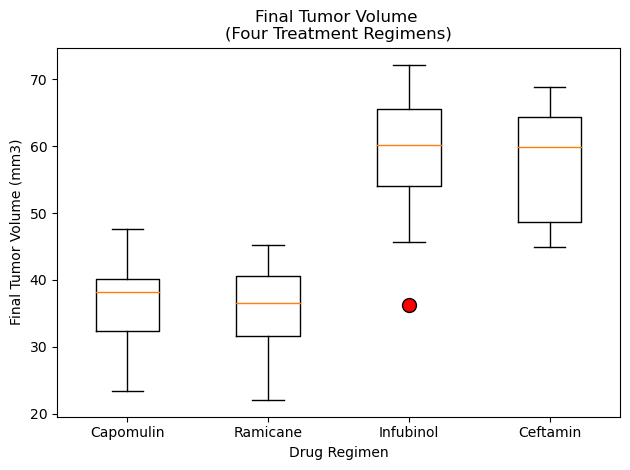

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(final_tumor_vol_list, labels=regimen, flierprops={'markerfacecolor':'r','markersize': 10})
final_tumor_plot.set_title('Final Tumor Volume \n(Four Treatment Regimens)')
final_tumor_plot.set_xlabel('Drug Regimen')
final_tumor_plot.set_ylabel('Final Tumor Volume (mm3)')

plt.tight_layout()
plt.show()

## Line and Scatter Plots

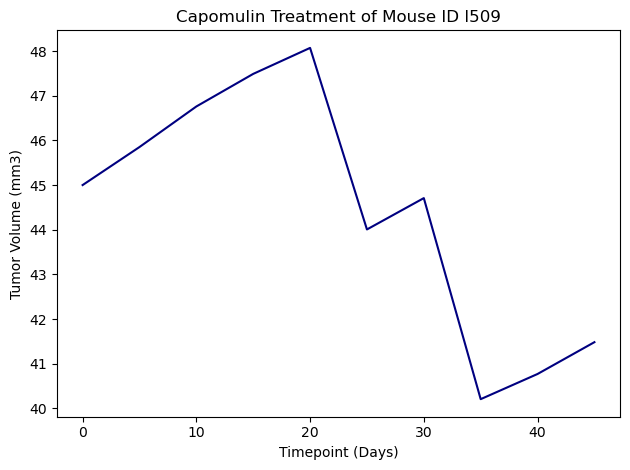

In [54]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Capomulin']

# Identify specific mouse ID and get data of the mouse id
mouse_id = 'l509'
mouse_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == mouse_id]


time_vol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], color='navy')


plt.title(f"Capomulin Treatment of Mouse ID {mouse_id}")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.tight_layout()

plt.show()


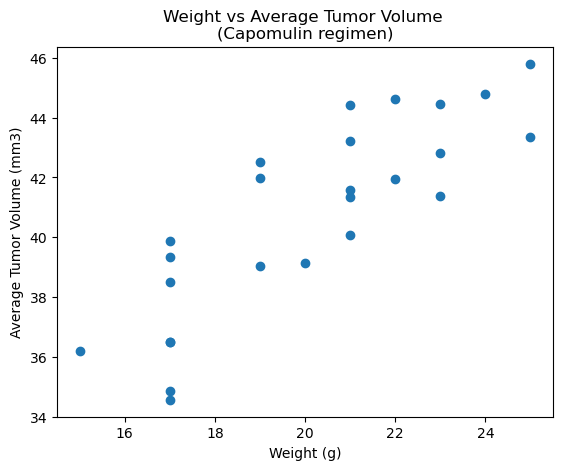

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Calculate mean of Weight (g) and Tumor Volume (mm3) based on Mouse ID
Capomulin_gp = Capomulin_df.groupby('Mouse ID').mean()

mice_weight_avg = Capomulin_gp['Weight (g)']
mice_tumor_avg = Capomulin_gp['Tumor Volume (mm3)']

plt.scatter(mice_weight_avg, mice_tumor_avg)
plt.title('Weight vs Average Tumor Volume \n(Capomulin regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and tumor vol is 0.84


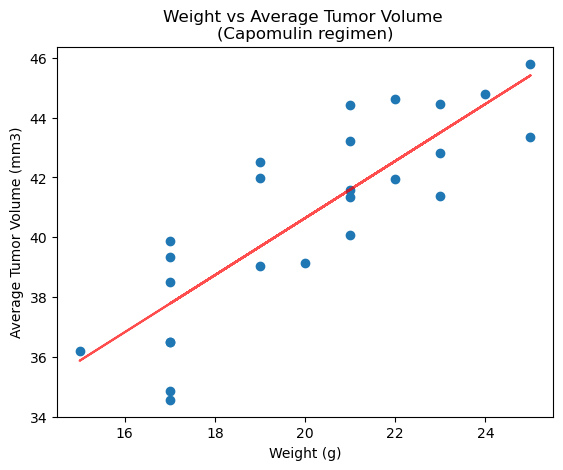

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


x_values = mice_weight_avg
y_values = mice_tumor_avg

# Calculate the correlation
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation between mouse weight and tumor vol is {correlation}")

# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# y = mx + b
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Gernerate scatter chart with liner regression line, equation of line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=0.7)

plt.title('Weight vs Average Tumor Volume \n(Capomulin regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


plt.show()